# Linear Regression

1. If the variable is categorical (type str) or quantative discrete (type integer)  and you need to plot the frequencies - use a bar plot or pie plot.
2. If the variable is quantative continuous and you need to plot frequancies - use histogram.
3. If the data is quantative continuous and you want to see its values relative to another variable - use line plot
3. To compare distributions of ordered variables use boxplot.
4. To check if two quantative variables are correlated - use scatter plot.

In [1]:
#run cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Read 'Bakery sales.csv' into data frame, parse date , drop Unnamed column and make unit_price into float

In [2]:

df = pd.read_csv('Bakery sales.csv',parse_dates=['date'])
df = df.drop('Unnamed: 0',axis=1)
df.unit_price = df.unit_price.str.replace(',','.').str.replace('€','').astype('float')

print(df.head())
print(df.info())

        date   time  ticket_number               article  Quantity  unit_price
0 2021-01-02  08:38       150040.0              BAGUETTE       1.0        0.90
1 2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT       3.0        1.20
2 2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT       2.0        1.20
3 2021-01-02  09:14       150041.0                  PAIN       1.0        1.15
4 2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE       5.0        1.20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           234005 non-null  datetime64[ns]
 1   time           234005 non-null  object        
 2   ticket_number  234005 non-null  float64       
 3   article        234005 non-null  object        
 4   Quantity       234005 non-null  float64       
 5   unit_price     234005 non-null  float64       


#### Add a column 'total' containing the total sale by multiplying the quantity bought by the unit price 

In [3]:
df['total']=df.Quantity*df.unit_price
df.head(3)

,date,time,ticket_number,article,Quantity,unit_price,total
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.9,0.9
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.2,3.6
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.2,2.4


#### Make a scatter plot showing the relationship between unit_price and total. Are the variables linearly correlated? Positive or negative correlation?

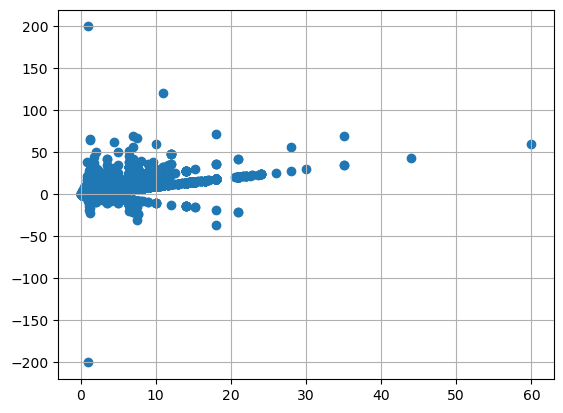

In [4]:
# CODE HERE
plt.scatter(df.unit_price, df.total)
plt.grid(True)
plt.show()

#### Calculate the correlation coefficient for unit_price and total

In [5]:
# CODE HERE
df[['unit_price', 'total', 'Quantity']].corr()

,unit_price,total,Quantity
unit_price,1.000000,0.690531,-0.076422
total,0.690531,1.000000,0.556604
Quantity,-0.076422,0.556604,1.000000


 #### Colour the graph according to values of Quantity and add gridlines


In [17]:
fig ,ax = plt.subplot()
ax.scatter ((df['unit_price'],df['total'] , c=df['unit_price'] )

plt.show()

SyntaxError: invalid syntax (2605938648.py, line 2)

#### Add regression line  to scatter plot

1.0562236123691855 0.6316539426237517
MSE = 3.6325637641574793
rmse = 1.9059285831734303
R^2 = 0.4768329170956155


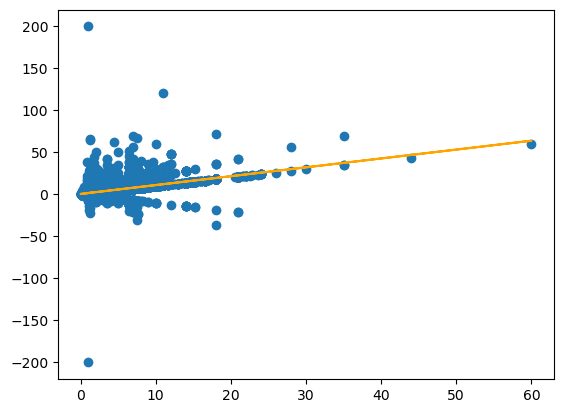

In [10]:

#import LinearRegression and instantiate class
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
lreg = LinearRegression()

#fit model and retrieve coefficient and intercept
#CODE HERE
X = df[['unit_price']]
y = df['total']
lreg.fit(X,y)
#plot  regression line
#CODE HERE
a,b =(lreg.coef_[0], lreg.intercept_)
print(a,b)

plt.scatter (df['unit_price'],df['total'])
plt.plot(df.unit_price , a * df.unit_price + b , c='orange')
#print mse

mse = mean_squared_error(y,lreg.predict(X))
r2 = r2_score(y,lreg.predict(X))
print('MSE = ' + str(mse))
print('rmse = '+ str(mse**0.5))
print('R^2 = '+str(r2))


#### Make residuals plot

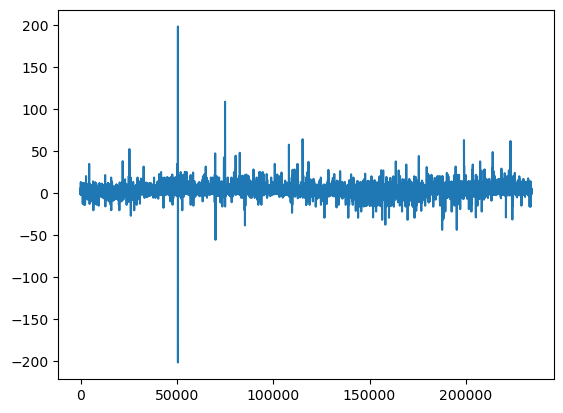

In [11]:
residuals = y - lreg.predict(X)
plt.plot(residuals)
plt.show()


#### Calculate mean and standard devaition of residuals

In [12]:
res_mean = residuals.mean()
res_sd = residuals.std()
print(res_mean,res_sd)
residuals.head()


-2.212895270661433e-14 1.9059326555968121


0   -0.682255
1    1.700878
2    0.500878
3   -0.696311
4    4.100878
Name: total, dtype: float64

#### Remove outliers - residuals that are further than 2 standard devaitions from the mean. (Removes about 5% of data if noramlly distributed)

In [13]:
filt = residuals.apply(lambda x: -2*res_sd < x < 2*res_sd)
res_filtered = residuals[filt]


In [14]:
#mean anda standart deviation of filtered residuals
print(res_filtered.mean())
print(res_filtered.std())

-0.2012644339685422
0.9698403702116709


In [15]:
res_filtered.describe()

count    225536.000000
mean         -0.201264
std           0.969840
min          -3.715989
25%          -0.710367
50%          -0.693500
75%           0.406500
max           3.784011
Name: total, dtype: float64

#### What is rmse now?

In [16]:
#What is rmse now?
#CODE HERE
(res_filtered**2).sum() / len(res_filtered)

0.9810935456063606